In [13]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
#!pip install category_encoders
import category_encoders as ce

# Visualization
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns
%matplotlib inline

# Preprocessing & Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectPercentile

# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Modeling
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.base import ClassifierMixin

# Evaluation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss

# Utility
import os
import time
import datetime
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
import pickle
from tqdm import tqdm
import platform
from itertools import combinations
from scipy.stats.mstats import gmean

import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from category_encoders import (BinaryEncoder,
                                JamesSteinEncoder, 
                                TargetEncoder,
                                BackwardDifferenceEncoder,
                                LeaveOneOutEncoder,
                                MEstimateEncoder,
                                HelmertEncoder,
                                CatBoostEncoder, 
                                CountEncoder, 
                                HashingEncoder)
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import set_config
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_iterative_imputer   
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import seaborn as sns


from sklearn.model_selection import train_test_split, cross_val_score, cross_validate

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
# !pip install bayesian-optimization
from bayes_opt import BayesianOptimization
#!pip install num2words
#from num2words import num2words

In [3]:
#train 전체 매물에서 LH 매물 정보를 삭제한 데이터셋
#test 전체 매물 정보 내 라벨링이 되어 있는 LH 매물들로 구성된 데이터셋
OPST_train = pd.read_csv('OPST_최종.csv',encoding = 'euc-kr', index_col = 'Unnamed: 0')
OPST_train.drop(columns = ['address','city','space'],inplace=True)
OPST_target = pd.read_csv('OPST_target.csv', encoding = 'euc-kr')
OPST_train

,cost,opst,floor,gu,dong,평수
0,70000,그랜드파크 1동,고,강북구,미아동,5.1
1,80000,그랜드파크 1동,고,강북구,미아동,5.6
2,80000,그랜드파크 1동,고,강북구,미아동,5.6
3,80000,그랜드파크 1동,고,강북구,미아동,5.6
4,70000,그랜드파크 1동,저,강북구,미아동,5.6
...,...,...,...,...,...,...
25318,130000,헤리티지1차 1동,중,양천구,신정동,8.6
25319,93000,헤리티지1차 1동,저,양천구,신정동,5.4
25320,150000,헤리티지2차 1동,고,양천구,신정동,8.2
25321,160000,헤리티지2차 1동,중,양천구,신정동,8.2


In [4]:
OPST_target['dong'] = '가'
c = OPST_train.groupby(['opst','dong'])[['gu']].count().reset_index()
a = ['루비온 1동','SJ라벨라 1동','라시떼 1동','르메이에르종로타운 1동','스테이더디자이너스 1동','시티플러스 1동','신성스카이뷰 1동','신현빌5차 1동','안틸리아자양 1동','여의도리버캐슬2차 1동','왕십리역요진와이하우스 1동','용산클라우드나인 1동','펜타곤스카이 1동','플래티노 1동','힐스테이트에코마곡나루역라마다앙코르 1동','왕십리렉스프리미엄 1동','중계브라운스톤 101동']
b = []
for i in a:
    b.append(c[c['opst'] == i]['dong'].unique().reshape(1,1)[0][0])
for i,j in zip(['명남더블레스 1동','아스테르 1동','케이타워 1동'],['영등포동 1가','상봉동','장안동']):
    a.append(i)
    b.append(j)
for i,j in zip(a,b):
    OPST_target.loc[list(OPST_target[OPST_target['opst'] == i].index),'dong'] = j
OPST_train = OPST_train[~OPST_train['opst'].isin(OPST_target['opst'])].reset_index(drop = True)
OPST_target

,gu,opst,cost,평수,floor,dong
0,종로구,르메이에르종로타운 1동,240000.0,17.1,고,종로1가
1,종로구,루비온 1동,100000.0,5.5,중,인의동
2,종로구,루비온 1동,100000.0,5.5,고,인의동
3,종로구,루비온 1동,100000.0,5.5,고,인의동
4,종로구,루비온 1동,100000.0,5.5,고,인의동
...,...,...,...,...,...,...
836,영등포구,여의도리버캐슬2차 1동,80000.0,7.0,저,영등포동2가
837,영등포구,여의도리버캐슬2차 1동,80000.0,7.0,중,영등포동2가
838,영등포구,여의도리버캐슬2차 1동,80000.0,6.6,중,영등포동2가
839,영등포구,여의도리버캐슬2차 1동,80000.0,6.6,중,영등포동2가


In [5]:
# 기타 추가전인 전처리가 필요한 부분에 대해서 진행
OPST_train.loc[list(OPST_train[(OPST_train['dong'] == '목동') & (OPST_train['cost'] >= 6000000)].index),'cost'] = 650000
OPST_train.loc[list(OPST_train[OPST_train['opst'] == '목동이스타빌 에이동'].index), 'cost'] = 200000 
OPST_train.loc[list(OPST_train[OPST_train['opst'] == '보스코 1동'].index), 'cost'] = 100000

In [6]:
#x_train = OPST_train.drop(columns = 'cost')
x_train = OPST_train.drop(columns = ['cost','opst'])
y_train = OPST_train['cost']

#x_test = OPST_target.drop(columns = 'cost')
x_test = OPST_target.drop(columns = ['cost','opst'])
y_test = OPST_target['cost']

feature들은 수치형으로 변환하는 과정

In [7]:
x_train['floor'].replace({'고' : 3, '중' : 2, '저' : 1}, inplace=True)
x_test['floor'].replace({'고' : 3, '중' : 2, '저' : 1}, inplace=True) ;x_test

,gu,평수,floor,dong
0,종로구,17.1,3,종로1가
1,종로구,5.5,2,인의동
2,종로구,5.5,3,인의동
3,종로구,5.5,3,인의동
4,종로구,5.5,3,인의동
...,...,...,...,...
836,영등포구,7.0,1,영등포동2가
837,영등포구,7.0,2,영등포동2가
838,영등포구,6.6,2,영등포동2가
839,영등포구,6.6,2,영등포동2가


In [8]:
#데이터 통합해서 원핫 인코딩
merged_data = pd.concat([x_train, x_test], axis=0)
merged_data_encoded = pd.get_dummies(merged_data, columns=['gu', 'dong'])

# Train 데이터와 Test 데이터로 다시 나누기
x_train = merged_data_encoded[:len(x_train)]
x_test = merged_data_encoded[len(x_train):]
x_test

,floor,평수,gu_강남구,gu_강동구,gu_강북구,gu_강서구,gu_관악구,gu_광진구,gu_구로구,gu_금천구,...,dong_홍은동,dong_홍익동,dong_홍지동,dong_화곡동,dong_화양동,dong_황학동,dong_효제동,dong_후암동,dong_휘경동,dong_흥인동
0,3,17.1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,5.5,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,5.5,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,5.5,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3,5.5,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,1,7.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
837,2,7.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
838,2,6.6,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
839,2,6.6,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


RandomForestClassifier로 예측

In [9]:
# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.1439


In [10]:
OPST_target['예측_cost'] = pred
OPST_target[['cost','예측_cost']]

,cost,예측_cost
0,240000.0,150000
1,100000.0,100000
2,100000.0,100000
3,100000.0,100000
4,100000.0,100000
...,...,...
836,80000.0,75000
837,80000.0,100000
838,80000.0,105000
839,80000.0,105000


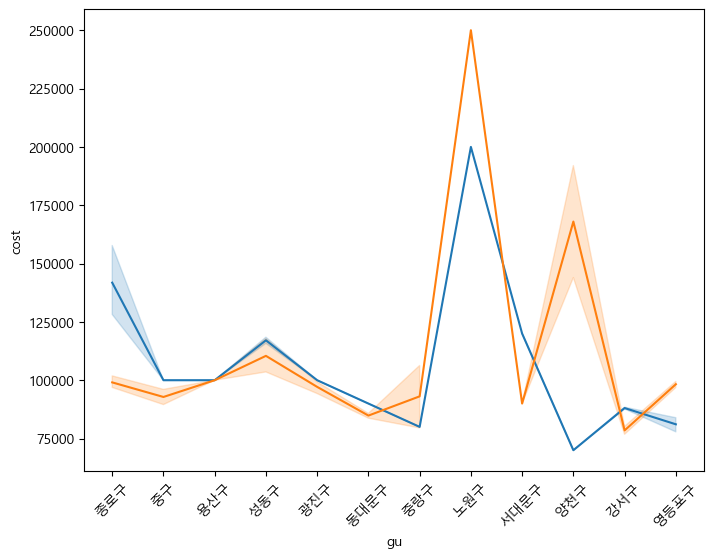

In [11]:
plt.rc('font', family = 'malgun Gothic')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize = (8,6))
sns.lineplot(x = 'gu',y='cost', data = OPST_target)
sns.lineplot(x = 'gu', y='예측_cost', data = OPST_target)
plt.xticks(rotation = 45)
plt.show()

분석결과 대체로 예측이 잘 되었으나, 양천구, 노원구, 종로구 등 오차 범위가 큰 구간 존재 <br/>
예측값을 나타내기에는 분류보다는 회귀가 더 적합할 것이라고 판단되어 회귀로 다시 진행 <br/>
RandomForestRegressor

In [14]:
rf_rger = RandomForestRegressor(random_state=0)
rf_rger.fit(x_train, y_train)
y_pred = rf_rger.predict(x_test)
RMSE = mean_squared_error(y_test, y_pred)**0.5

print('랜덤 포레스트 : {:.4f}'.format(RMSE))

랜덤 포레스트 : 24245.2908


In [15]:
OPST_target['예측_cost'] = y_pred
OPST_target[['cost','예측_cost']]

,cost,예측_cost
0,240000.0,153291.900266
1,100000.0,102529.390909
2,100000.0,106240.909524
3,100000.0,106240.909524
4,100000.0,106240.909524
...,...,...
836,80000.0,83527.936508
837,80000.0,93075.833333
838,80000.0,101174.230769
839,80000.0,101174.230769


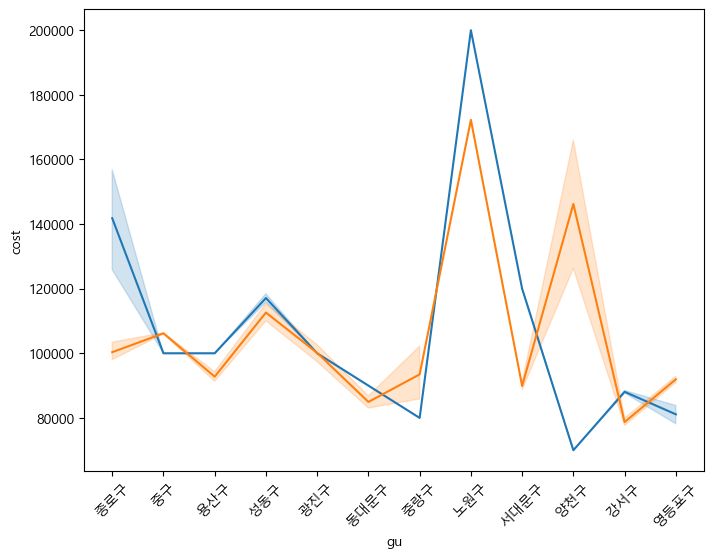

In [16]:
plt.rc('font', family = 'malgun Gothic')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize = (8,6))
sns.lineplot(x = 'gu',y='cost', data = OPST_target)
sns.lineplot(x = 'gu', y='예측_cost', data = OPST_target)
plt.xticks(rotation = 45)
plt.show()

그럼에도 오차범위가 큰 부분이 존재하기 때문에 이유에 대해서 분석

In [96]:
train_노원 = OPST_train[OPST_train['gu'] == '노원구']
test_노원 = OPST_target[OPST_target['gu'] == '노원구']

display(train_노원)
display(test_노원)

,cost,opst,floor,gu,dong,평수
15229,70000,건양 1동,저,노원구,공릉동,5.2
15230,70000,건양 1동,저,노원구,공릉동,5.2
15231,70000,건양 1동,중,노원구,공릉동,5.2
15232,70000,건양 1동,저,노원구,공릉동,5.2
15233,70000,건양 1동,저,노원구,공릉동,4.8
...,...,...,...,...,...,...
24164,200000,씨앤미 1동,중,노원구,중계동,15.2
24165,150000,씨앤미 1동,고,노원구,중계동,10.3
24166,200000,씨앤미 1동,고,노원구,중계동,15.2
24167,150000,씨앤미 1동,중,노원구,중계동,10.5


,gu,opst,cost,평수,floor,dong,예측_cost
294,노원구,중계브라운스톤 101동,200000.0,20.9,중,중계동,172265.40404


노원구의 test 데이터가 하나밖에 존재하지 않음

In [97]:
train_노원.dong.unique()

array(['공릉동', '상계동', '월계동', '중계동', '하계동'], dtype=object)

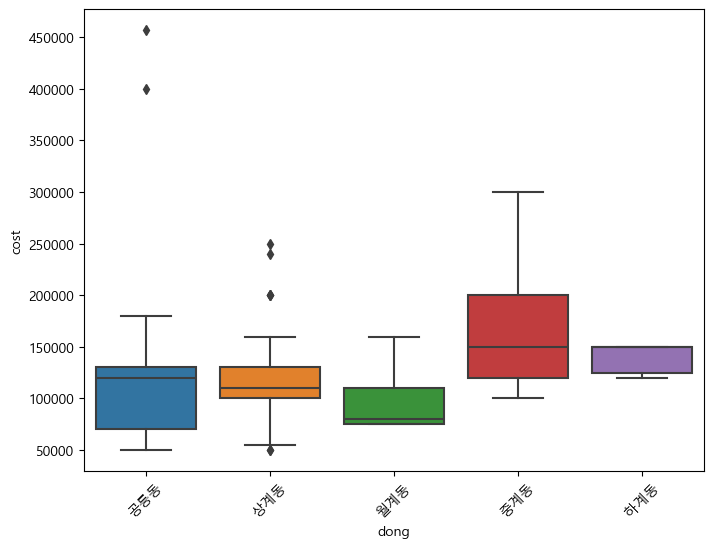

In [98]:
plt.figure(figsize = (8,6))
sns.boxplot(x = 'dong', y = 'cost', data = train_노원)
plt.xticks(rotation = 45)
plt.show()

In [99]:
train_종로 = OPST_train[OPST_train['gu'] == '종로구']
test_종로 = OPST_target[OPST_target['gu'] == '종로구']

display(train_종로)
display(test_종로)

,cost,opst,floor,gu,dong,평수
13234,100000,운현궁SK허브 101동,중,종로구,경운동,10.3
13235,87000,운현궁SK허브 101동,중,종로구,경운동,9.2
13236,130000,운현궁SK허브 101동,중,종로구,경운동,12.4
13237,120000,운현궁SK허브 101동,중,종로구,경운동,12.8
13238,85000,운현궁SK허브 101동,저,종로구,경운동,9.2
...,...,...,...,...,...,...
23285,100000,센트럴시티대학로 1동,중,종로구,효제동,5.2
23286,110000,센트럴시티대학로 1동,고,종로구,효제동,5.2
23287,100000,센트럴시티대학로 1동,중,종로구,효제동,5.2
23288,100000,이지마루종로 101동,저,종로구,효제동,10.4


,gu,opst,cost,평수,floor,dong,예측_cost
0,종로구,르메이에르종로타운 1동,240000.0,17.1,고,종로1가,153291.900266
1,종로구,루비온 1동,100000.0,5.5,중,인의동,102529.390909
2,종로구,루비온 1동,100000.0,5.5,고,인의동,106240.909524
3,종로구,루비온 1동,100000.0,5.5,고,인의동,106240.909524
4,종로구,루비온 1동,100000.0,5.5,고,인의동,106240.909524
5,종로구,루비온 1동,100000.0,5.5,고,인의동,106240.909524
6,종로구,루비온 1동,100000.0,5.5,저,인의동,102030.842857
7,종로구,루비온 1동,100000.0,5.5,저,인의동,102030.842857
8,종로구,루비온 1동,100000.0,5.5,저,인의동,102030.842857
9,종로구,루비온 1동,100000.0,5.5,저,인의동,102030.842857


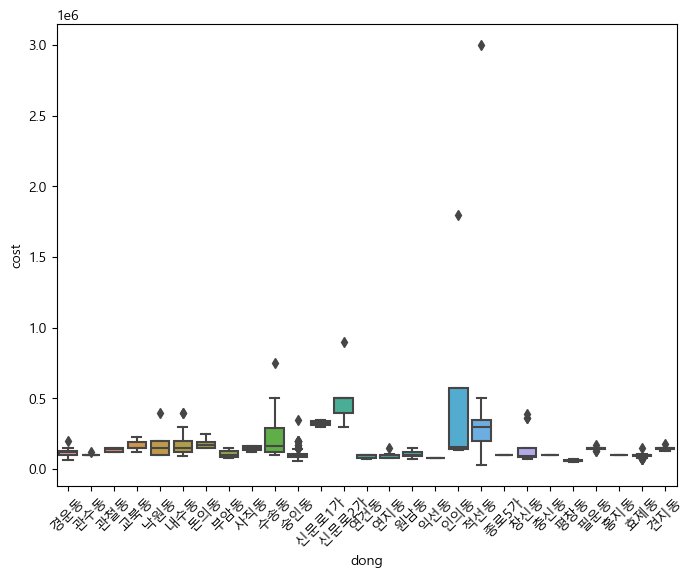

In [100]:
plt.figure(figsize = (8,6))
sns.boxplot(x = 'dong', y = 'cost', data = train_종로)
plt.xticks(rotation = 45)
plt.show()

In [101]:
train_양천 = OPST_train[OPST_train['gu'] == '양천구']
test_양천 = OPST_target[OPST_target['gu'] == '양천구']

display(train_양천)
display(test_양천)

,cost,opst,floor,gu,dong,평수
17047,60000,그라비스 1동,중,양천구,목동,9.0
17048,60000,그라비스 1동,고,양천구,목동,9.0
17049,80000,그라비스 1동,중,양천구,목동,9.0
17050,60000,그라비스 1동,중,양천구,목동,9.0
17051,80000,그라비스 1동,중,양천구,목동,9.0
...,...,...,...,...,...,...
25011,130000,헤리티지1차 1동,중,양천구,신정동,8.6
25012,93000,헤리티지1차 1동,저,양천구,신정동,5.4
25013,150000,헤리티지2차 1동,고,양천구,신정동,8.2
25014,160000,헤리티지2차 1동,중,양천구,신정동,8.2


,gu,opst,cost,평수,floor,dong,예측_cost
325,양천구,신성스카이뷰 1동,70000.0,11.8,저,신정동,106361.380952
326,양천구,신성스카이뷰 1동,70000.0,12.7,저,신정동,170730.238095
327,양천구,신성스카이뷰 1동,70000.0,11.6,저,신정동,107187.407407
328,양천구,신성스카이뷰 1동,70000.0,12.8,저,신정동,170763.571429
329,양천구,신성스카이뷰 1동,70000.0,12.5,저,신정동,176072.857143
330,양천구,신성스카이뷰 1동,70000.0,11.8,저,신정동,106361.380952
331,양천구,신성스카이뷰 1동,70000.0,12.7,저,신정동,170730.238095
332,양천구,신성스카이뷰 1동,70000.0,11.6,저,신정동,107187.407407
333,양천구,신성스카이뷰 1동,70000.0,12.8,저,신정동,170763.571429
334,양천구,신성스카이뷰 1동,70000.0,12.5,저,신정동,176072.857143


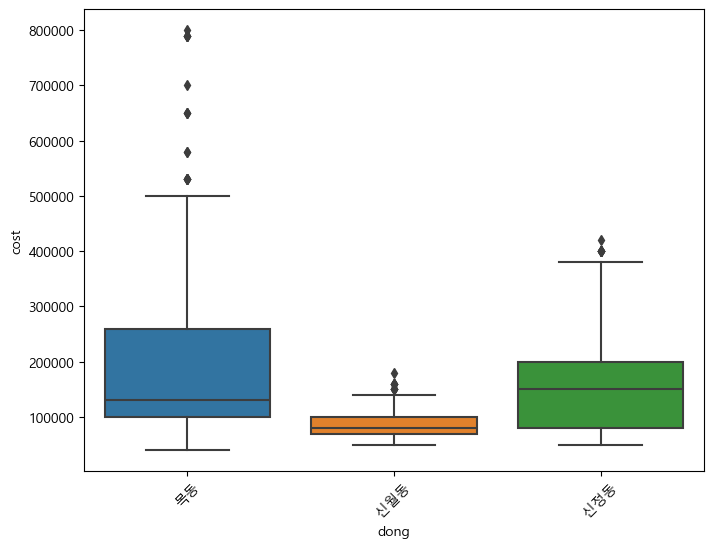

In [102]:
plt.figure(figsize = (8,6))
sns.boxplot(x = 'dong', y = 'cost', data = train_양천)
plt.xticks(rotation = 45)
plt.show()

많이 엇나간 구에 대해서 분석해본 결과 outlier들이 존재 <br/>
outlier를 제거하고 다시 수행

In [120]:
#원본 데이터 훼손방지를 위해 copy()
new_opst_train = OPST_train.copy()
new_opst_target = OPST_target.copy()
new_opst_target.drop('예측_cost', axis = 1, inplace = True)

In [121]:
# 각 동별로 Q3 + 1.5 IQR 을 넘는 값은 outlier로 범주하고 삭제하기 위한 limit_dic 생성
def cut_outlier(x):
    limit_dic = {}
    for i in x.dong.unique():
        Q3 = x[x['dong']== i ]['cost'].quantile(.75)
        Q1 = x[x['dong']== i ]['cost'].quantile(.25)
        IQR = Q3 - Q1
        Limit = Q3 + 1.5 * IQR
        limit_dic[i] = {'limit_cost': Limit}
    limit_dic = pd.DataFrame.from_dict(limit_dic).T.reset_index()
    limit_dic.rename(columns= {'index':'dong'},inplace = True)
    return limit_dic

In [122]:
#train에 적용
limit_dic = cut_outlier(new_opst_train);limit_dic

,dong,limit_cost
0,미아동,145000.0
1,번동,145000.0
2,수유동,172500.0
3,가양동,160000.0
4,공항동,191250.0
...,...,...
261,신정동,380000.0
262,송정동,125000.0
263,을지로4가,90000.0
264,견지동,165000.0


In [123]:
new_opst_train = pd.merge(new_opst_train,limit_dic, how= 'left', on = 'dong')
new_opst_train

,cost,opst,floor,gu,dong,평수,limit_cost
0,70000,그랜드파크 1동,고,강북구,미아동,5.1,145000.0
1,80000,그랜드파크 1동,고,강북구,미아동,5.6,145000.0
2,80000,그랜드파크 1동,고,강북구,미아동,5.6,145000.0
3,80000,그랜드파크 1동,고,강북구,미아동,5.6,145000.0
4,70000,그랜드파크 1동,저,강북구,미아동,5.6,145000.0
...,...,...,...,...,...,...,...
25011,130000,헤리티지1차 1동,중,양천구,신정동,8.6,380000.0
25012,93000,헤리티지1차 1동,저,양천구,신정동,5.4,380000.0
25013,150000,헤리티지2차 1동,고,양천구,신정동,8.2,380000.0
25014,160000,헤리티지2차 1동,중,양천구,신정동,8.2,380000.0


In [124]:
#target에도 transform 하기 위해서 동일하게 진행
limit_dic1 = cut_outlier(new_opst_target);limit_dic1

,dong,limit_cost
0,종로1가,240000.0
1,인의동,100000.0
2,숭인동,200000.0
3,신당동,100000.0
4,원효로3가,100000.0
5,도선동,135000.0
6,자양동,100000.0
7,장안동,90000.0
8,상봉동,80000.0
9,중계동,200000.0


In [125]:
new_opst_target = pd.merge(new_opst_target,limit_dic1, how= 'left', on = 'dong')
new_opst_target

,gu,opst,cost,평수,floor,dong,limit_cost
0,종로구,르메이에르종로타운 1동,240000.0,17.1,고,종로1가,240000.0
1,종로구,루비온 1동,100000.0,5.5,중,인의동,100000.0
2,종로구,루비온 1동,100000.0,5.5,고,인의동,100000.0
3,종로구,루비온 1동,100000.0,5.5,고,인의동,100000.0
4,종로구,루비온 1동,100000.0,5.5,고,인의동,100000.0
...,...,...,...,...,...,...,...
836,영등포구,여의도리버캐슬2차 1동,80000.0,7.0,저,영등포동2가,80000.0
837,영등포구,여의도리버캐슬2차 1동,80000.0,7.0,중,영등포동2가,80000.0
838,영등포구,여의도리버캐슬2차 1동,80000.0,6.6,중,영등포동2가,80000.0
839,영등포구,여의도리버캐슬2차 1동,80000.0,6.6,중,영등포동2가,80000.0


In [126]:
new_opst_train['rule'] = new_opst_train.apply(lambda x: 'ok' if x['cost'] <= x['limit_cost'] else np.nan, axis = 1)
new_opst_train[new_opst_train['rule'].isnull()==True]
new_opst_target['rule'] = new_opst_target.apply(lambda x: 'ok' if x['cost'] <= x['limit_cost'] else np.nan, axis = 1)
new_opst_target[new_opst_target['rule'].isnull()==True]

,gu,opst,cost,평수,floor,dong,limit_cost,rule


In [127]:
new_opst_train.dropna(inplace = True)
new_opst_train.drop(columns= ['rule','limit_cost'], axis = 1, inplace = True)
new_opst_target.dropna(inplace = True)
new_opst_target.drop(columns= ['rule','limit_cost'], axis = 1, inplace = True)

In [128]:
#X_train = OPST_train.drop(columns = 'cost')
X_train = new_opst_train.drop(columns = ['cost','opst'])
y_train = new_opst_train['cost']

#X_test = OPST_target.drop(columns = 'cost')
X_test = new_opst_target.drop(columns = ['cost','opst'])
y_test = new_opst_target['cost']

In [129]:
X_train['floor'].replace({'고' : 3, '중' : 2, '저' : 1}, inplace=True)
X_test['floor'].replace({'고' : 3, '중' : 2, '저' : 1}, inplace=True) ;X_test

,gu,평수,floor,dong
0,종로구,17.1,3,종로1가
1,종로구,5.5,2,인의동
2,종로구,5.5,3,인의동
3,종로구,5.5,3,인의동
4,종로구,5.5,3,인의동
...,...,...,...,...
836,영등포구,7.0,1,영등포동2가
837,영등포구,7.0,2,영등포동2가
838,영등포구,6.6,2,영등포동2가
839,영등포구,6.6,2,영등포동2가


In [130]:
#데이터 통합해서 원핫 인코딩
merged_data = pd.concat([X_train, X_test], axis=0)
merged_data_encoded = pd.get_dummies(merged_data, columns=['gu', 'dong'])

# Train 데이터와 Test 데이터로 다시 나누기
X_train = merged_data_encoded[:len(X_train)]
X_test = merged_data_encoded[len(X_train):]
X_test


,floor,평수,gu_강남구,gu_강동구,gu_강북구,gu_강서구,gu_관악구,gu_광진구,gu_구로구,gu_금천구,...,dong_홍은동,dong_홍익동,dong_홍지동,dong_화곡동,dong_화양동,dong_황학동,dong_효제동,dong_후암동,dong_휘경동,dong_흥인동
0,3,17.1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,5.5,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,5.5,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,5.5,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3,5.5,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,1,7.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
837,2,7.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
838,2,6.6,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
839,2,6.6,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [133]:
# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_rger = RandomForestRegressor(random_state=0)
rf_rger.fit(X_train, y_train)
y_pred = rf_rger.predict(X_test)
RMSE = mean_squared_error(y_test, y_pred)**0.5

#print('랜덤 포레스트 : {:.4f}'.format(RMSE))

In [136]:
new_opst_target['예측_cost'] = y_pred
new_opst_target[['cost','예측_cost']]

,cost,예측_cost
0,240000.0,151575.158730
1,100000.0,100033.960317
2,100000.0,99865.388889
3,100000.0,99865.388889
4,100000.0,99865.388889
...,...,...
836,80000.0,84687.738095
837,80000.0,90400.595238
838,80000.0,99677.865079
839,80000.0,99677.865079


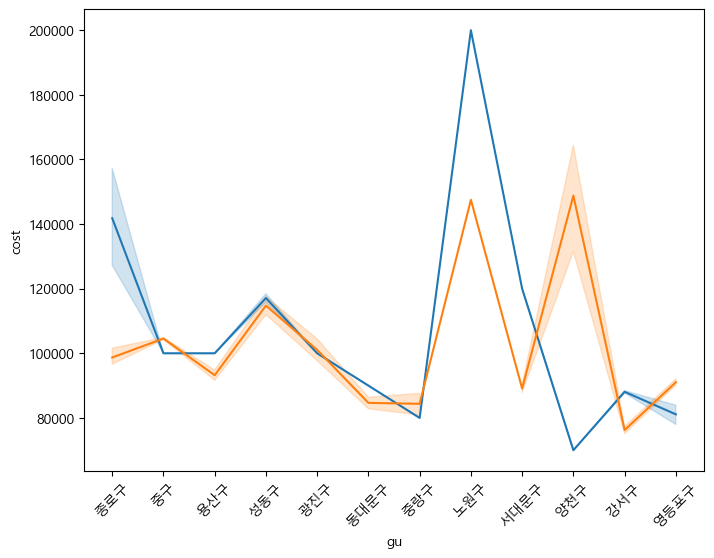

In [137]:
plt.rc('font', family = 'malgun Gothic')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize = (8,6))
sns.lineplot(x = 'gu',y='cost', data = new_opst_target)
sns.lineplot(x = 'gu', y='예측_cost', data = new_opst_target)
plt.xticks(rotation = 45)
plt.show()

종로구와 양천구는 OUTLIER 제거 이후 오차 범위가 확실히 줄어든 현상 관찰 <Br/>
그러나 절대적인 학습 데이터양 확보의 한계로 예측에 어려움